In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 数据集

from sklearn  import datasets

dataset = datasets.make_moons(noise=0.15, random_state=666)

print(type(dataset))

<class 'tuple'>


In [3]:
X = dataset[0]
y = dataset[1]

X.shape, y.shape

((100, 2), (100,))

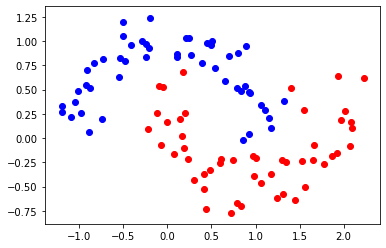

In [4]:
plt.scatter(X[y==1,0], X[y==1, 1], color="red")
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

def polynoimalSVC(degree, C=1.0):
    
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("stand", StandardScaler()),
        ("svc", LinearSVC(C=C))
    ])



In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape((-1, 1)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape((-1, 1))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap= custom_cmap)

In [10]:
poly_svc = polynoimalSVC(3)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('stand', StandardScaler()), ('svc', LinearSVC())])

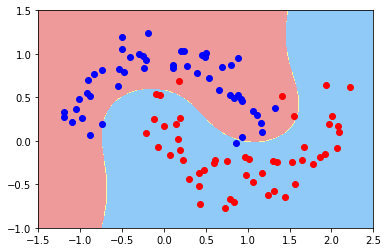

In [11]:
plot_decision_boundary(poly_svc, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.show()

In [12]:
## 使用kernel
from sklearn.svm import SVC

def ploynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("stand", StandardScaler()),
        ("svc", SVC(kernel="poly", degree=degree, C=C))
    ])


In [15]:
poly_kernel_svc = ploynomialKernelSVC(3, C=1.0)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('stand', StandardScaler()), ('svc', SVC(kernel='poly'))])

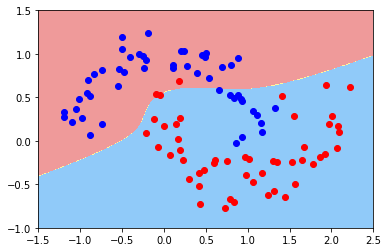

In [16]:
plot_decision_boundary(poly_kernel_svc, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.show()